In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Data Set\breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Label Encoding

In [3]:
data['diagnosis']=data['diagnosis'].map({'M':0,'B':1})

In [4]:
data['diagnosis'].unique()

array([0, 1], dtype=int64)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Handling Outliers `

In [6]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

iqr=q3-q1

data=data[~((data<(q1-1.5*iqr))|((data>(q3+1.5*iqr)))).any(axis=1)]

In [7]:
data.shape

(346, 32)

In [8]:
X=data.drop(columns='diagnosis')
y=data['diagnosis']

#### Feature Selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X,y)

importance=model.feature_importances_

final_features=pd.DataFrame({'features':pd.DataFrame(X).columns,'importance':importance})
final_features=final_features.sort_values(by='importance',ascending=False)

top=final_features.head(10)
new=top['features'].values
new

array(['concave points_worst', 'perimeter_worst', 'radius_worst',
       'concave points_mean', 'area_worst', 'area_mean', 'perimeter_mean',
       'radius_mean', 'area_se', 'concavity_worst'], dtype=object)

In [10]:
top

,features,importance
28,concave points_worst,0.153379
23,perimeter_worst,0.116240
21,radius_worst,0.110597
8,concave points_mean,0.085281
24,area_worst,0.080448
4,area_mean,0.059720
3,perimeter_mean,0.057615
1,radius_mean,0.042481
14,area_se,0.037290
27,concavity_worst,0.031302


In [11]:
X_new=data[['radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst', 'concavity_mean', 'concave points_mean',
       'perimeter_mean', 'area_mean', 'radius_mean', 'area_se']]

#### Feature Scaling`

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X_new)

In [13]:
X_scaler

array([[ 2.42617281,  2.47441653,  2.67359868, ...,  2.09516629,
         1.95641453,  1.77736286],
       [ 1.28410241,  1.14801687,  1.29026609, ...,  1.01634012,
         1.06402559,  0.91423415],
       [ 0.5567676 ,  0.61565238,  0.4605699 , ...,  0.94908052,
         0.99599594,  0.66109267],
       ...,
       [ 0.13584192,  0.34044701,  0.02676165, ...,  0.38962318,
         0.49177618, -0.43649788],
       [ 0.08013117,  0.08328789, -0.05453948, ...,  0.13706561,
         0.275682  ,  0.22695181],
       [ 1.21910653,  1.27885221,  1.21139186, ...,  1.28493309,
         1.29612675,  1.43211138]])

### Model Selction

In [14]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaler,y,test_size=0.33,random_state=42)

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

classifier=DecisionTreeClassifier()
classifier.fit(Xtrain,ytrain)
param_space={
    'criterion':['gini','entropy'],
    'max_depth':(1,1000),
    'min_samples_split':(2,20),
    'min_samples_leaf':(1,20)
}

bayes_search= BayesSearchCV(
    estimator=classifier,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2
)

bayes_search.fit(Xtrain,ytrain)

best_params=bayes_search.best_params_
best_score=bayes_search.best_score_
print(best_params)
print(best_score)

best_clf=bayes_search.best_estimator_
y_pred=best_clf.predict(Xtest)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(ytest,y_pred)
acc

0.9478260869565217

<Figure size 1000x1000 with 0 Axes>

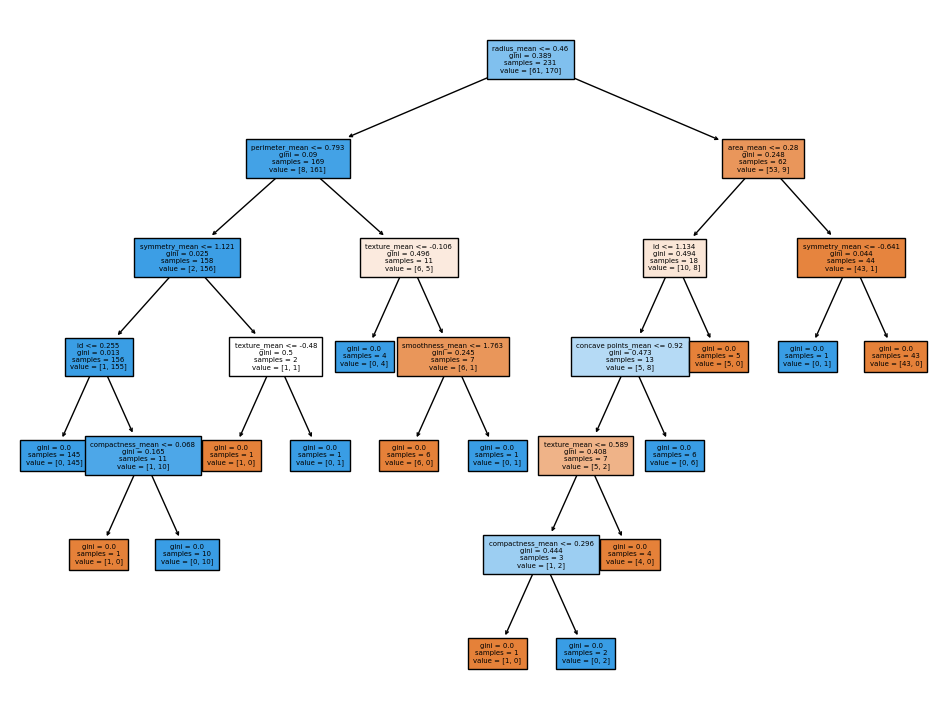

In [27]:
plt.figure(figsize=(10,10))
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
tree.plot_tree(classifier, feature_names=X.columns.tolist(), filled=True,fontsize=5, max_depth=593)
plt.show()

#### Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV

random_classifier=RandomForestClassifier()

param_space={
    'criterion':['gini','entropy'],
    'max_depth':(1,1000),
    'min_samples_split':(2,20),
    'min_samples_leaf':(1,10),
}

bayes_search=BayesSearchCV(
    estimator=random_classifier,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
)

bayes_search.fit(Xtrain,ytrain)
best_param=bayes_search.best_params_
best_score=bayes_search.best_score_

print(best_param)
print(best_score)

best_rand_class=bayes_search.best_estimator_
ypred=best_rand_class.predict(Xtest)
ypred

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 959, 1, 2] before, using random point ['gini', 81, 7, 16]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
OrderedDict([('criterion', 'entropy'), ('max_depth', 13), ('min_samples_leaf', 1), ('min_samples_split', 6)])
0.9435707678075855


array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1], dtype=int64)

In [72]:
accR=accuracy_score(ytest,ypred)

In [73]:
accR

0.9478260869565217

#### SVM

In [81]:
from sklearn.svm import SVC
from skopt import BayesSearchCV

svclassifier=SVC()

param_space={
    'C':[0.1,1,10],
    'gamma':['scale','auto'],
    'kernel':['linear','rbf','poly']
}

svc_search=BayesSearchCV(
    estimator=svclassifier,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
)

svc_search.fit(Xtrain,ytrain)
best_param=svc_search.best_params_
best_score=svc_search.best_score_
print(best_param)
print(best_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 'auto', 'linear'] before, using random point [0.1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'scale', 'linear'] before, using random point [10, 'auto', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'linear'] before, using random point [10, 'auto', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'rbf'] before, using random point [1, 'auto', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'linear'] before, using random point [1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [10, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [1, 'scale', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 'auto', 'poly'] before, using random point [10, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'scale', 'linear'] before, using random point [0.1, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'scale', 'rbf'] before, using random point [0.1, 'auto', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'poly'] before, using random point [0.1, 'scale', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'linear'] before, using random point [0.1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 'scale', 'poly'] before, using random point [10, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'scale', 'linear'] before, using random point [10, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'scale', 'linear'] before, using random point [10, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [10, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'poly'] before, using random point [1, 'auto', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [0.1, 'auto', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [10, 'auto', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 'auto', 'poly'] before, using random point [0.1, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'linear'] before, using random point [10, 'scale', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'rbf'] before, using random point [10, 'scale', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'auto', 'linear'] before, using random point [0.1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [1, 'auto', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'poly'] before, using random point [10, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [1, 'scale', 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [1, 'scale', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [0.1, 'auto', 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'auto', 'linear'] before, using random point [10, 'scale', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\melbi\AppData\Roaming\Python\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'scale', 'linear'] before, using random point [1, 'auto', 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
OrderedDict([('C', 10), ('gamma', 'auto'), ('kernel', 'linear')])
0.9435707678075855
